In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
x, y = make_classification(n_samples=5000, n_features=10, n_classes=3, n_clusters_per_class=1)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)

In [ ]:
lsvc = LinearSVC(verbose=0)
print(lsvc)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

LinearSVC()


LinearSVC(dual=True)

In [ ]:
lsvc.fit(xtrain, ytrain)
score = lsvc.score(xtrain, ytrain)
print("Score: ", score)

Score:  0.7908235294117647


In [ ]:
cv_scores = cross_val_score(lsvc, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

CV average score: 0.79


In [ ]:
ypred = lsvc.predict(xtest)
cm = confusion_matrix(ytest, ypred)
print(cm)

[[213  33   0]
 [ 34 176  62]
 [  9  15 208]]


In [ ]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       246
           1       0.79      0.65      0.71       272
           2       0.77      0.90      0.83       232

    accuracy                           0.80       750
   macro avg       0.80      0.80      0.80       750
weighted avg       0.80      0.80      0.79       750



In [ ]:
iris = load_iris()
x, y = iris.data, iris.target
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)

In [ ]:
lsvc = LinearSVC(verbose=0)
print(lsvc)

lsvc.fit(xtrain, ytrain)
score = lsvc.score(xtrain, ytrain)
print("Score: ", score)

cv_score =cross_val_score(lsvc, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_score.mean())

ypred = lsvc.predict(xtest)
cm = confusion_matrix(ytest, ypred)
print(cm)

print(classification_report(ytest, ypred))

LinearSVC()
Score:  0.9606299212598425
CV average score: 0.94
[[9 0 0]
 [0 7 1]
 [0 0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.88      0.93         8
           2       0.86      1.00      0.92         6

    accuracy                           0.96        23
   macro avg       0.95      0.96      0.95        23
weighted avg       0.96      0.96      0.96        23



In [ ]:
from __future__ import division, print_function
import numpy as np
from sklearn import datasets, svm
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
def evaluate_on_test_data(model):
    predictions = model.predict(X_test)
    correct_classifications = 0

    for i in range(len(y_test)):
        if predictions[i] == y_test[i]:
            correct_classifications += 1

    accuracy = (correct_classifications / len(y_test)) * 100
    return accuracy

In [ ]:
kernels = ('linear', 'poly', 'rbf')
accuracies = []
for index, kernel in enumerate(kernels):
    model = svm.SVC(kernel=kernel)
    model.fit(X_train, y_train)
    acc = evaluate_on_test_data(model)
    accuracies.append(acc)
    print("{} % accuracy with kernel = {}".format(acc, kernel))

84.21052631578947 % accuracy with kernel = linear
76.31578947368422 % accuracy with kernel = poly
84.21052631578947 % accuracy with kernel = rbf


In [ ]:
svc = svm.SVC(kernel='linear').fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3).fit(X_train, y_train)

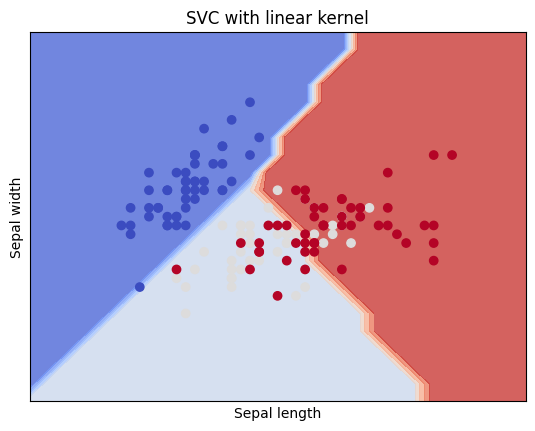

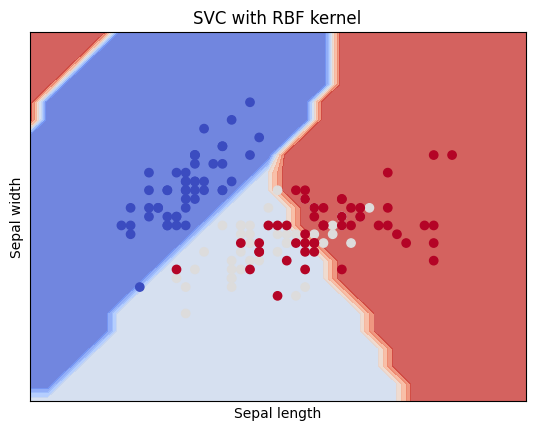

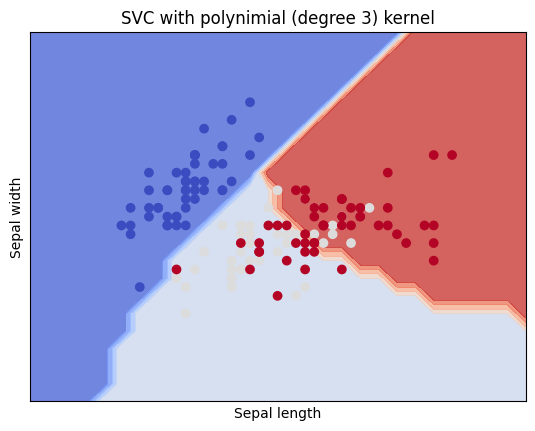

In [ ]:
h = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['SVC with linear kernel', 'SVC with RBF kernel', 'SVC with polynimial (degree 3) kernel']

for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    plt.figure(i)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [ ]:
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split

X, y = fetch_openml("mnist_784", version = 1, return_X_y = True, as_frame=False)
X_train = X[:600]
y_train = y[:600]
X_test = X[600:]
y_test = y[600:]

In [ ]:
from sklearn.svm import LinearSVC
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

LinearSVC(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

1.0

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)
y_pred = lin_clf.predict(X_train_scaled)
print("Accuracy: ", accuracy_score(y_train, y_pred))

Accuracy:  1.0
